# **7.2 SKLEARN Basics:**
## Datos -  Módulos - Hiperparámetros - Under y Overfit - Métricas básicas

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## **A - Datos en SKLEARN**

<font size = 5> SkLearn nos proporciona múltiples datasets para que podamos entrenar con ellos:

In [2]:
from sklearn import datasets
iris = datasets.load_iris() # Datos etiquetados sobre flores
b_cancer = datasets.load_breast_cancer() # Datos etiquetados sobre cancer de mama
digits = datasets.load_digits() # Datos etiquetados sobre digitos escritos a mano
diabetes = datasets.load_diabetes() # Datos etiquetados sobre diabetes
vinos = datasets.load_wine() # Datos etiquetados sobre vinos

<font size = 5>

Los datasets siempre vienen en la forma de un **diccionario** donde los datos suelen encontrarse en la forma de listas o arrays de numpy.

Los dos componentes más importantes son las **Características** (lo que se usa como *input*, *features en inglés*) y las **Etiquetas**. (los *outputs*, *target* o *label* en inglés).

Lógicamente los datasets pensados para entrenamientos de aprendizaje no supervisado no cuentan con etiquetas.

Suelen contener una descripción detallada en la key ***'DESCR'***:

In [3]:
vinos

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
print(vinos.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
vinos.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

<font size = 5> Para visualizar es mejor un dataframe. Tenemos los datos en un array de numpy ***'data'*** y los nombres de los parámetros en una lista ***'feature_names'***

In [6]:
vinos.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
import pandas as pd
pd.DataFrame(vinos.data, columns=vinos.feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
vinos.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# Representamos los targets como un dataframe:
pd.DataFrame(np.unique(vinos.target, return_counts=True),
             columns=vinos.target_names).drop(index=0).head()

,class_0,class_1,class_2
1,59,71,48


In [10]:
# Lógicamente, tanto las etiquetas como los datos tienen la misma longitud:
print(vinos.data.shape, vinos.target.shape)

(178, 13) (178,)


## **B - Módulos en SKLEARN**

<font size = 5>

SKLEARN contiene todos sus algoritmos de resolución en diversos módulos que los agrupan. Por funcionamiento interno de SKLEARN, **estos módulos no son directamente accesibles desde el import inicial de la librería**, por lo que hemos de importar cada módulo que vayamos a usar.

Por ejemplo, para utilizar un Support Vector Classifier podríamos usar el código *'sklearn.svm.SVC()'*. Esto nos dará error porque estamos utilizando el módulo 'svm' sin haberlo importado previamente. El código correcto es:
```
    from sklearn import svm
    svm = sklearn.svm.SVC()
```

<font size = 5>

Algunos de los módulos más útiles y utilizados tanto en SKLEARN como fuera de la librería son:

* **sklearn.preprocessing**: Amplio conjunto de herramientas ya preparadas para el tratamiento previo de los datos.

* **sklearn.model_selection**: Conjunto de herramientas que permiten ayudar a adaptar los datos para un mejor uso en los modelos. Incluye funciones 'splitter' para separar los conjuntos de datos, métodos de optimización de hiperparámetros y otros aspectos.

* **sklearn.metrics**: Conjunto de metodologías de evaluación que permiten analizar de manera precisa los resultados obtenidos.

## **C - Ejemplo de Resolución:**

<font size = 5>

Los algoritmos se crean como variables. Se inicializan y no tienen ningún conocimiento útil al principio:

In [11]:
# Creamos varios clasificadores para el problema de los vinos:
from sklearn import neighbors
k_vecinos = sklearn.neighbors.KNeighborsClassifier()

from sklearn import tree
arbol = sklearn.tree.DecisionTreeClassifier()

from sklearn import ensemble
bosque = sklearn.ensemble.RandomForestClassifier()

from sklearn import svm
svm = sklearn.svm.SVC()

<font size = 5>

Una vez inicializados, son los datos los que 'ajustan' ese algoritmo a encontrar la solución ('fit'):

In [12]:
# Ajustamos los clasificadores a los datos:
k_vecinos.fit(vinos.data, vinos.target)

# Medimos la precisión del clasificador:
# Precisión: Fracción de predicciones correctas
k_vecinos.score(vinos.data, vinos.target)

0.7865168539325843

In [13]:
# Miramos la precisión de los otros clasificadores:
arbol.fit(vinos.data, vinos.target)
bosque.fit(vinos.data, vinos.target)
svm.fit(vinos.data, vinos.target);

print(k_vecinos.score(vinos.data, vinos.target),
      arbol.score(vinos.data, vinos.target),
      bosque.score(vinos.data, vinos.target),
      svm.score(vinos.data, vinos.target))

0.7865168539325843 1.0 1.0 0.7078651685393258


In [14]:
# Ejemplo de otra métrica: Matriz de confusión
from sklearn import metrics
confusion = pd.DataFrame(metrics.confusion_matrix(vinos.target, arbol.predict(vinos.data)),
                         columns = vinos.target_names,
                         index = vinos.target_names,
                         )
confusion.style.set_caption("Matriz de confusión")

print(confusion, '\n*Filas: Valor real\n*Columnas: Valor predicho')

         class_0  class_1  class_2
class_0       59        0        0
class_1        0       71        0
class_2        0        0       48 
*Filas: Valor real
*Columnas: Valor predicho


In [15]:
import matplotlib.pyplot as plt

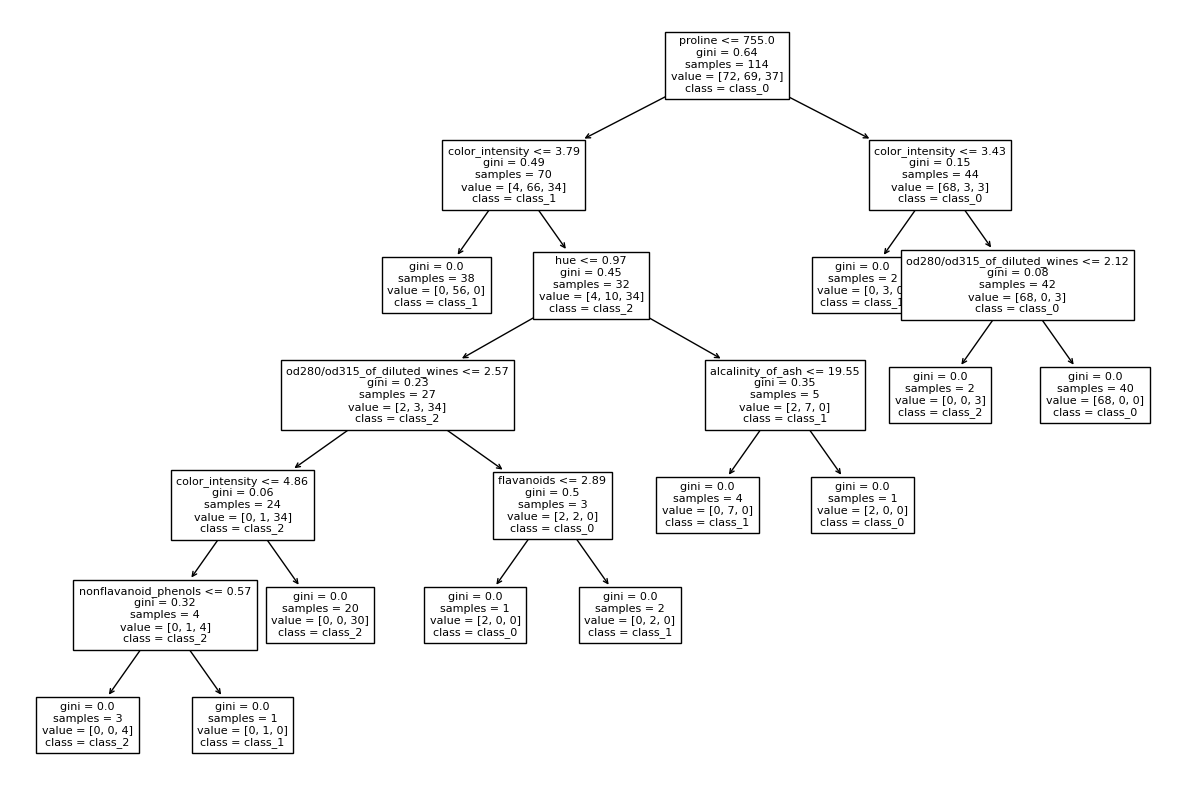

In [16]:
# Ejemplo de otra métrica: Reporte de clasificación
ax = plt.subplots(figsize=(15,10))
sklearn.tree.plot_tree(bosque.estimators_[0], 
                       feature_names=vinos.feature_names,
                       class_names=vinos.target_names,
                       precision=2,
                       fontsize=8);

## **D - Hiperparámetros**

<font size = 5>

Es decir: los algoritmos tienen parámetros internos que se van modificando para ajustarse a la solución deseada.

Sin embargo, **existen algunos parámetros que determinan aspectos de cada algoritmo y que no se modifican**, son conocidos como hiperparámetros y quedan fijados al inicializar el algoritmo.

Podemos observarlos con ***'.get_params()'***.

In [17]:
arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [18]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

<font size = 5>

Dependiendo de nuestros datos y nuestro problema hemos de hacer una decisión informada de los hiperparámetros a señalar, los cuales varían con cada algoritmo concreto. 

Por supuesto, cada algoritmo tiene descritos sus hiperparámetros de manera extensa en la documentación de la librería.

## **E - Underfitting y Overfitting:**

<center><img src="./imgs/sphx_glr_plot_underfitting_overfitting_001.png">

<font size = 5>

Recordemos: lo que buscamos con los algoritmos es aproximar a la función que relaciona los datos con las etiquetas. **La información que subyace a los datos** es la que nos permite hacer predicciones sobre datos nuevos.

Por lo tanto, **nuestro objetivo no es ajustar el modelo a los datos de entrenamiento, sino a la información que subyace a los datos de entrenamiento**.

Llamamos **Underfitting** a la situación en la que el modelo no es capaz de capturar la información subyacente a los datos de entrenamiento. En este caso, el modelo no es capaz de hacer buenas predicciones ni sobre los datos de entrenamiento ni sobre datos nuevos.

Llamamos **Overfitting** a la situación en la que el modelo se ajusta demasiado a los datos de entrenamiento, capturando incluso el ruido de los datos. En este caso, el modelo es capaz de hacer buenas predicciones sobre los datos de entrenamiento (se los aprende 'de memoria'), pero no sobre datos nuevos.

La selección de hiperparámetros es clave para evitar estos escenarios.

## **F - La importancia de tener sets de datos separados para entrenamiento y testeo:**

<font size = 5>

De lo anterior se deriva que no tiene demasiado sentido medir la bondad de un algoritmo usando los mismos datos que se le han enseñado para entrenar. 

Lo importante es cómo se comporta el algoritmo frente a datos que no ha observado nunca. 

**Por lo tanto necesitamos al menos dos sets de datos: entrenamiento y test**

In [19]:
# Cargamos los datos del set de flores:
iris = datasets.load_iris()

# Los separamos en train y test - Sklearn tiene una función para esto:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, shuffle=True)

In [20]:
# Por supuesto, mantenemos los tamaños de los datos:
print(iris.data.shape, iris.target.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Creamos un clasificador y lo ajustamos a los datos de entrenamiento:
k_vecinos = KNeighborsClassifier()
k_vecinos.fit(X_train, y_train)

# Medimos la precisión del clasificador pero usando los datos de test:
k_vecinos.score(X_test, y_test)

0.9666666666666667

In [26]:
# Comparemos con la precisión usando los datos de entrenamiento:
k_vecinos.score(X_train, y_train)

0.975

<font size = 5>

**¿Qué indica que la precisión en datos de entrenamiento sea signficativamente superior a la precisión en los datos de test?**

## **G - Métricas:**

<font size = 5>

**El número de métricas existentes es [abrumador](https://scikit-learn.org/1.0/modules/classes.html?highlight=metrics#module-sklearn.metrics)**

Pero es clave mantener en mente al menos las más básicas, algunas de ellas ya las hemos visto:

### **G.1 - Clasificación:**

<font size = 5>

**Accuracy_score** - [Precisión](https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score): Nº de éxitos / Nº de intentos. ¿Qué problema tiene esta métrica? Podemos usarla de varias formas:

* Cuando tenemos un modelo usamos el método *'.score()'*. Dependiendo de si proporcionamos los datos de test o no nos dará una precisión u otra.
* Usando *'from sklearn.metrics import accuracy_score'* y proporcionando los datos de test o de train según la precisión que queramos.

In [29]:
k_vecinos.score(X_test, y_test)

0.9666666666666667

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, k_vecinos.predict(X_test))

0.9666666666666667

<font size = 5>

**Confusion Matrix** - [Matriz de Confusión](https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Visión detallada de predicciones frente a etiquetas reales. Podemos usarla de dos formas principales:
* Usando *'from sklearn.metrics import confusion_matrix'* y ejecutándola con los valores reales y los valores predichos por el modelo.
* Podemos mostrarla como un gráfico con 'from sklearn.metrics import ConfusionMatrixDisplay' y pasando como parámetros las etiquetas reales, las predichas y, si queremos, los nombres de las etiquetas.

In [33]:
# Datos básicos:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, k_vecinos.predict(X_test))

confusion

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]], dtype=int64)

In [34]:
# En forma de DataFrame:
pd.DataFrame(confusion, columns=iris.target_names, index=iris.target_names)

,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,10,0
virginica,0,1,10


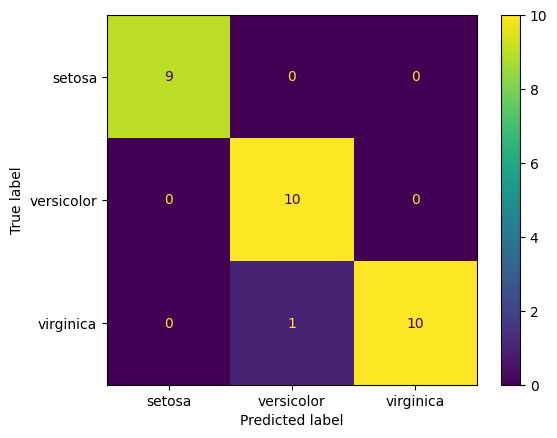

In [35]:
# En forma de gráfico:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,
                                        k_vecinos.predict(X_test),
                                        display_labels = iris.target_names)

<font size = 5>

**Area Under Receiver Operating Characteristic** - [Área ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html): Medida de bondad de los algoritmos que mide los verdaderos positivos frente a los falsos positivos. De esta manera ayuda a distanciar la percepción de 'precisión' del ruido que pueda contenerse en los datos.

* Usando *'from sklearn.metrics import roc_auc_score'* y ejecutándola con los valores reales y los valores predichos por el modelo (...).
* Podemos mostrarla como un gráfico con 'from sklearn.metrics import roc_curve' y pasando como parámetros las etiquetas reales, las predichas (...).

In [36]:
# ROC AUC SCORE:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, k_vecinos.predict_proba(X_test), multi_class='ovr')

0.9951076555023924

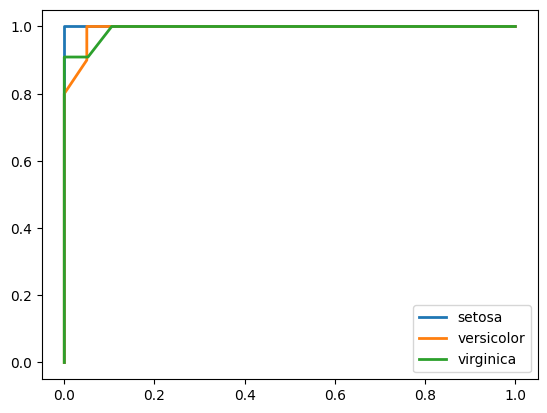

In [37]:
# Roc curve
from sklearn.metrics import roc_curve
# Hacemos un plot para cada clase:
for clase in range(3):
    fpr, tpr, thresholds = roc_curve(y_test, k_vecinos.predict_proba(X_test)[:,clase], pos_label=clase)
    plt.plot(fpr, tpr, lw=2, label=iris.target_names[clase])

plt.legend()


<font size = 5>

**F1 Score** - [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): Medida que combina precisión (verdaderos positivos frente a falsos positivos) y sensitividad (verdaderos positivos frente a total de verdaderos positivos y falsos negativos). Se combinan estas dos métricas, dando pie a una métrica que al tener en consideración también la relación entre falsos negativos nos permite observar con mayor detalle cómo se comporta un algoritmo **cuando los datos que tenemos están muy desbalanceados**.

* Usando *'from sklearn.metrics import f1_score'* y ejecutándola con los valores reales y los valores predichos por el modelo (...).
* Podemos mostrarla como un gráfico con 'from sklearn.metrics import roc_curve' y pasando como parámetros las etiquetas reales, las predichas (...).

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, k_vecinos.predict(X_test), average='macro')

0.9682539682539683

### **G.2 - Regresión:**

<font size = 5>

**Max Error** - [Error Máximo](https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error): Máximo del error residual de todas las medidas.

* Usando *'from sklearn.metrics import max_error'* y ejecutándola con los valores reales y los valores predichos por el modelo.

<font size = 5>

**Mean Absolute Error** - [MAE - Media de errores al cuadrado](https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error): Promedio de los valores de error.

* Usando *'from sklearn.metrics import mean_absolute_error'* y ejecutándola con los valores reales y los valores predichos por el modelo (...).

<font size = 5>

**Mean Squared Error** - [MSE - Media de errores al cuadrado](https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error): Promedio de los valores de error elevados al cuadrado.

* Usando *'from sklearn.metrics import mean_squared_error'* y ejecutándola con los valores reales y los valores predichos por el modelo (...).

## **H - Exploración de Hiperparámetros:**

<font size = 5>

Hay dos técnicas principales para explorar hiperparámetros óptimos para los modelos: 
* **Grid Search**: Búsqueda intensiva por una permutación de hiperparámetros.
* **Random Search**: Búsqueda aleatoria por una distribución de hiperparámetros.

Por debajo, estas técnicas evalúan multiples variantes de los modelos y para ello usan **Cross-Validation**

In [39]:
k_vecinos.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### **Cross-Validation**:

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)

array([0.95833333, 1.        , 1.        , 1.        , 0.95833333])

### **Grid Search**

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Matriz de hiperparámetros
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Objeto de búsqueda de hiperparámetros optimos
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)

# Busqueda de hiperparámetros optimos
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros
best_params = grid_search.best_params_
best_params

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

### **Random Search**:

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint

# Distribucion de hiperparámetros
param_dist = {'C': uniform(0, 10),
              'gamma': uniform(0, 1),
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': randint(1, 5)}

# Objeto de búsqueda de hiperparámetros optimos
model = SVC()
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5)

# Busqueda de hiperparámetros optimos
random_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = random_search.best_params_
best_params


{'C': 1.741789740099119,
 'degree': 3,
 'gamma': 0.2995855812303213,
 'kernel': 'linear'}